In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import requests

<h2>Should you bet on the Favourites?</h2>

<p>In this project, I set out to explore how likely an underdog is to win a fight. Unsurprisingly, the data suggests that the underdog are less likely to win than to lose—at least within this dataset. This outcome is expected as it does not challenge the conventional wisdom behind the term "Underdog." It seems that, in this case, the label carries the typical disadvantage one might assume.</p>

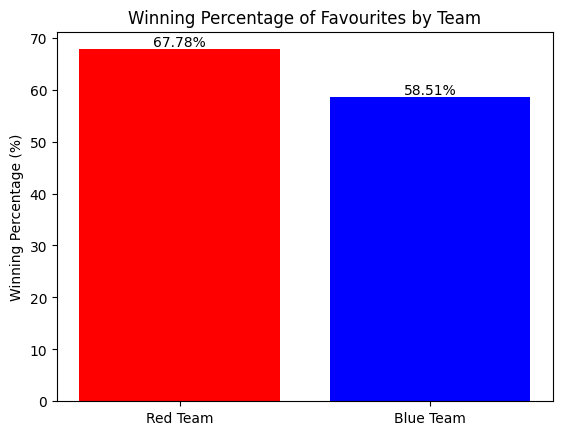

In [5]:
# Load the dataset
ufc_df = pd.read_csv('./data/ufc-master.csv')

# Filter necessary columns
combined_fighters_df = pd.read_csv('./data/ufc-master.csv',
                                   usecols=[0,1,2,3,9])

# Calculate the total number of favourites for both teams
redMask = combined_fighters_df['RedOdds'] < 0
redFavouritesTotal = combined_fighters_df.loc[redMask].shape[0]

blueMask = combined_fighters_df['BlueOdds'] < 0 
blueFavouritesTotal = combined_fighters_df.loc[blueMask].shape[0]

# Calculate the number of Favourites wins for both teams
redFavouritesWinMask = (combined_fighters_df['RedOdds'] < 0) & (combined_fighters_df['Winner'] == 'Red')
redFavouritesWins = combined_fighters_df.loc[redFavouritesWinMask].shape[0]

blueFavouritesWinMask = (combined_fighters_df['BlueOdds'] < 0) & (combined_fighters_df['Winner'] == 'Blue')
blueFavouritesWins = combined_fighters_df.loc[blueFavouritesWinMask].shape[0]

# Calculate the winning percentages
redFavouritesWinPercentage = (redFavouritesWins / redFavouritesTotal) * 100
blueFavouritesWinPercentage = (blueFavouritesWins / blueFavouritesTotal) * 100


# ---- Plot the results ---- #


# Define labels
labels = ['Red Team', 'Blue Team']
winning_percentages = [redFavouritesWinPercentage, blueFavouritesWinPercentage]

# Create the bar chart
plt.bar(labels, winning_percentages, color=['red', 'blue'])

# Add labels and title
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage of Favourites by Team')

# Optional: Add the percentage values on top of the bars
for i, percentage in enumerate(winning_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [6]:
# Identify all Favourites
totalFavourites = (combined_fighters_df['BlueOdds'] < 0) | (combined_fighters_df['RedOdds'] < 0)

#  Count the total number of Favourites
totalFavouritesCount = combined_fighters_df[totalFavourites].shape[0]

#  Count the total number of Favourites wins
totalFavouritesWins = (
    ((combined_fighters_df['BlueOdds'] < 0) & (combined_fighters_df['Winner'] == 'Blue')) |
    ((combined_fighters_df['RedOdds'] < 0) & (combined_fighters_df['Winner'] == 'Red'))
).sum()

# Calculate the overall percentage of Favourites wins
totalFavouritesWinPercentage = (totalFavouritesWins / totalFavouritesCount) * 100

print(f"Overall Favourites Win Percentage: {totalFavouritesWinPercentage:.2f}%")


Overall Favourites Win Percentage: 67.61%
